## Сhecking the applicability conditions for ANOVA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, shapiro, levene

data_file = u"Anova.xlsx"
sheet_name = u"Task 1"

In [2]:
# read data
xl = pd.ExcelFile(data_file)
df = pd.read_excel(xl, sheetname=sheet_name, usecols=[0, 1])

In [3]:
# check data
df.head(5)

,variant,average
0,A,28.43206
1,A,29.59546
2,A,27.73723
3,A,26.34033
4,A,26.16822


In [4]:
# create variables for two groups
group_a = df.loc[df['variant'] == 'A']['average'].values
group_b = df.loc[df['variant'] == 'B']['average'].values

### Сhecking the applicability conditions
##### 1 The independence of samples and the independence of observations in each of the sample
the condition is fulfilled since observations in groups are recorded from different users

##### 2 The normal distribution of the feature in the samples

Graphical analysis using histograms

In [5]:
def hist_with_gauss(data):
    """plot histogram for variable with gaussian curve"""
    
    mu, sigma = norm.fit(data)
    plt.figure(1)
    n, bins, patches = plt.hist(data, bins='auto', normed=1)
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--', linewidth=2)
    
    return plt

<module 'matplotlib.pyplot' from 'C:\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

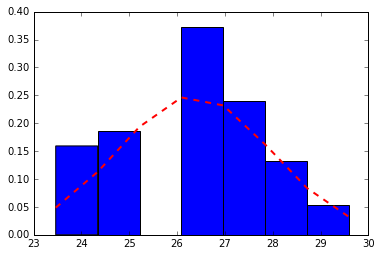

In [6]:
hist_with_gauss(group_a)

<module 'matplotlib.pyplot' from 'C:\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

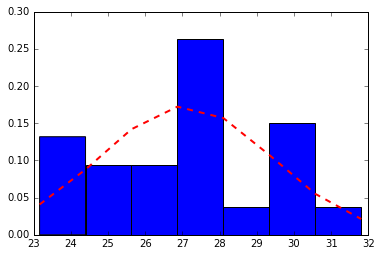

In [7]:
hist_with_gauss(group_b)

According to the histograms' types, it could be assumed that the data distributions in the samples differ from the normal ones.
Let's also verify this using the Shapiro-Wilk test

In [8]:
def is_normal(data):
    """Shapiro-Wilk test of normality """
    
    _, pvalue = shapiro(data)
    template = "{} (p-value={:.4f})"
    
    return template.format((pvalue > 0.05), pvalue)

In [9]:
print is_normal(group_a)
print is_normal(group_b)

True (p-value=0.1456)
False (p-value=0.0217)


According to the test, at a significance level of 5%, the data in group A are close to the normal distribution, the data in group B are not close to the normal distribution

##### 3 Equality of samples' variances
can be verified using the Levene test

In [10]:
levene(group_a, group_b, center='mean')

LeveneResult(statistic=7.7854797541116261, pvalue=0.0065163149559680127)

pvalue <0.05, therefore, at the significance level = 5% the variances of the groups are differ.
Repeat the Leven test, using the median as a measure of the average (since the distribution in one of the groups differs from the normal one)

In [11]:
levene(group_a, group_b, center='median')

LeveneResult(statistic=4.5025995363430473, pvalue=0.036788962761332547)

p-value has increased, but still remains <0.05

### Summary
Thus, two conditions for the application of the ANOVA are not met:
- there is no normal distribution of the feature in one of the samples
- there is no equality of variances between the samples

Consequently, the use of ANOVA to analyze the results is not justified. To analyze the results, it is better to choose a nonparametric criterion